In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

# Load the dataset (adjust path accordingly)
df = pd.read_csv(r'dataset\Groceries_dataset.csv')

# Show the first few rows of the data
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
# Group the data by Member_number (transactions) and collect the items in each transaction
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

# Use TransactionEncoder to transform the list of transactions into a one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the array into a DataFrame
basket = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the basket
basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules with a minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5, num_itemsets=len(frequent_itemsets))

# Display the association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Display the frequent itemsets
print(frequent_itemsets.head())


       antecedents   consequents   support  confidence      lift
0       (UHT-milk)  (whole milk)  0.040534    0.516340  1.126928
1           (beef)  (whole milk)  0.064135    0.536481  1.170886
2   (bottled beer)  (whole milk)  0.085428    0.537964  1.174124
3  (bottled water)  (whole milk)  0.112365    0.525810  1.147597
4    (brown bread)  (whole milk)  0.069779    0.513208  1.120091
    support         itemsets
0  0.078502       (UHT-milk)
1  0.031042  (baking powder)
2  0.119548           (beef)
3  0.079785        (berries)
4  0.062083      (beverages)


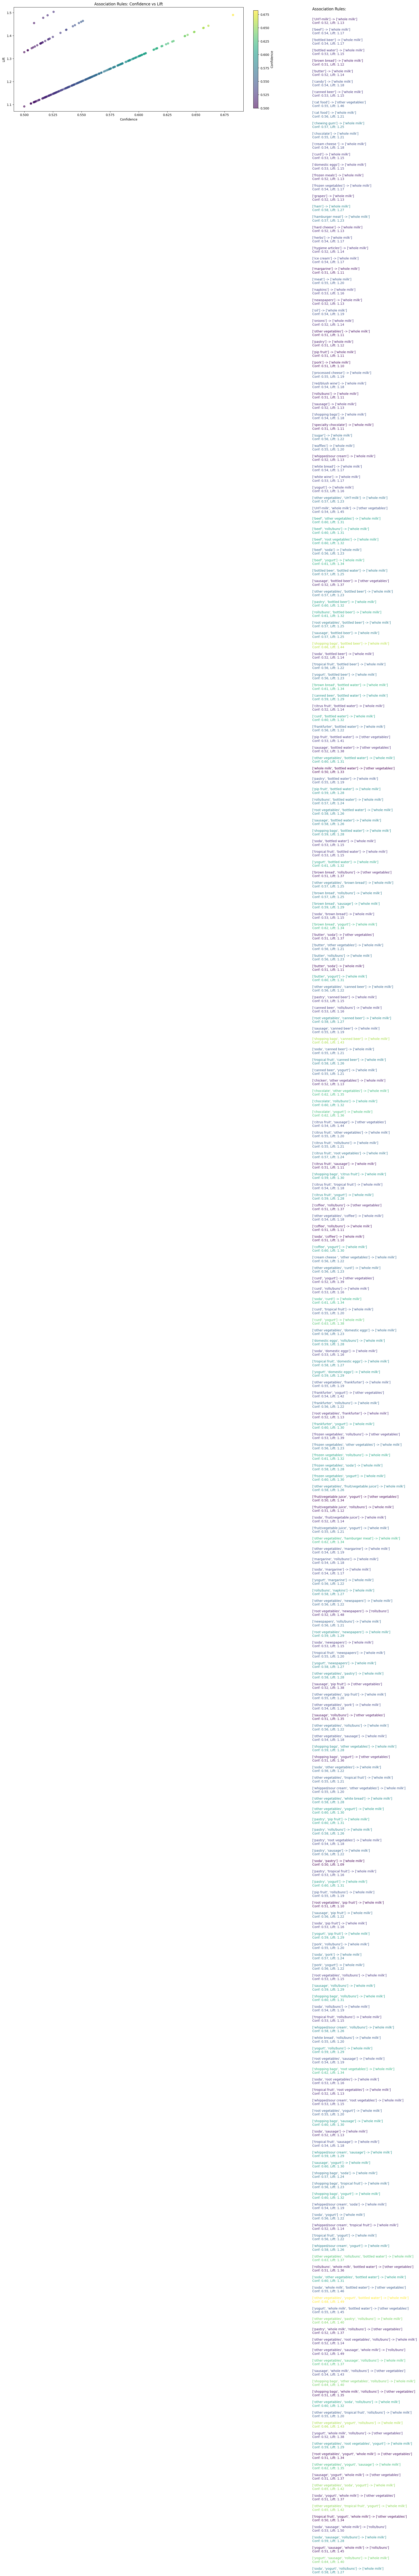

In [11]:
import matplotlib.pyplot as plt

# Scatter plot: Confidence vs Lift
plt.figure(figsize=(14, 6))

# Normalize confidence values for coloring the scatter plot
norm = plt.Normalize(rules['confidence'].min(), rules['confidence'].max())
cmap = plt.get_cmap("viridis")

# Create the scatter plot
scatter = plt.scatter(rules['confidence'], rules['lift'], c=rules['confidence'], cmap=cmap, alpha=0.6)

# Add color bar to indicate confidence scale
cbar = plt.colorbar(scatter, fraction=0.02, pad=0.04)
cbar.set_label('Confidence')

# Add axis labels and title
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules: Confidence vs Lift')

# Display the product names and rules on the side (more space to the right)
plt.text(1.3, 1, "Association Rules:", ha='left', va='top', fontsize=12, transform=plt.gca().transAxes)

# List the products with corresponding confidence and lift values, and color the names
for i in range(len(rules)):
    rule_text = f"{list(rules['antecedents'][i])} -> {list(rules['consequents'][i])}\n" \
                f"Conf: {rules['confidence'][i]:.2f}, Lift: {rules['lift'][i]:.2f}"
    color = cmap(norm(rules['confidence'][i]))  # Get the color based on confidence
    plt.text(1.3, 0.9 - i * 0.1, rule_text, ha='left', va='top', fontsize=10, transform=plt.gca().transAxes, color=color)

# Display the plot
plt.show()

